In [1]:
from bikebench.rendering import rendering

from bikebench.data_loading import data_loading

Using java as the Java binary


# Setup
We first load up the main Bike-Bench predictive modeling dataset and take the first datapoint as the example that we will render

In [2]:
data = data_loading.load_bike_bench_train()
data1 = data.iloc[0]

We initialize a renderer instance.

In [3]:
renderer = rendering.RenderingEngine(number_rendering_servers = 1, server_init_timeout_seconds=120)

We call the renderer, collect the generated SVG file and display it

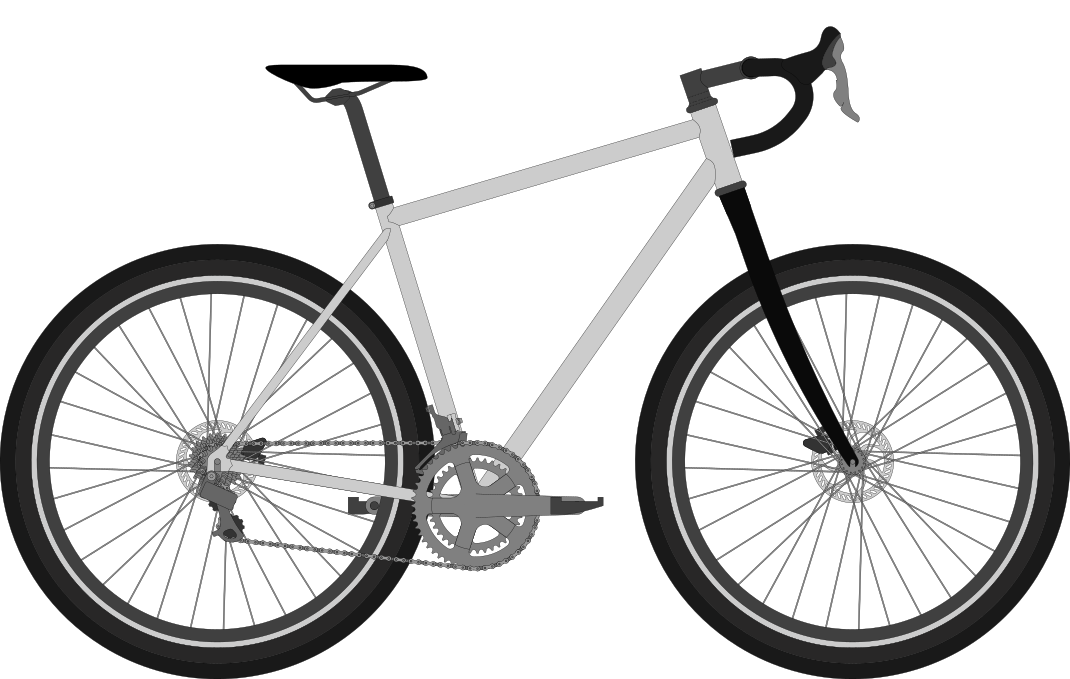

In [4]:

res = renderer.render_clip(data1)
svg = res.image_bytes
from IPython.display import SVG, display
display(SVG(svg))

We can also access the XML file generated in the rendering proces, which can be saved (or saved with the .bcad extension to open in the BikeCAD software)

In [5]:
print(res.xml_file)

#write xml to a .bcad file
with open("output.bcad", "w", encoding="utf-8") as f:
    f.write(res.xml_file)


<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE properties SYSTEM "http://java.sun.com/dtd/properties.dtd">
<properties>
<comment>Created on Tue Jan 26 11:50:22 EST 2021</comment>
<entry key="SSSIDECX3">65.5</entry>
<entry key="SSSIDECX2">131.0</entry>
<entry key="SSSIDECX1">305.7</entry>
<entry key="RACKFROM_TOP_OF_SEATSTAY offset">-27.0</entry>
<entry key="nSSSIDEANGLE_TWO offset">0.0</entry>
<entry key="RACKFROM_TOP_OF_SEATSTAY offsetX">-156.0</entry>
<entry key="DECAL_OFFSETREARWHEEL1">0.0</entry>
<entry key="BATTERY color sRGB">-13421773</entry>
<entry key="DECAL_SPACEREARWHEEL1">0.0</entry>
<entry key="DECAL_SPACEREARWHEEL2">0.0</entry>
<entry key="SPIDER_DIAMETER offsetX">0.0</entry>
<entry key="FrackS3TX offset">0.0</entry>
<entry key="SSSIDECY3">5.0</entry>
<entry key="SSSIDECY2">-10.0</entry>
<entry key="FENDER_EYELET_RADIUS offset">0.0</entry>
<entry key="SSSIDECY1">10.0</entry>
<entry key="REARWHEELGAP show">false</entry>
<entry key="Show Bike MODEL">false</entry>
<entry k

We can also render bikes with cyclists. To do so, we sample a set of rider dimensions from the conditioning priors and pass this to our rendering funciton when rendering. This will visualize the rider on the bike. 

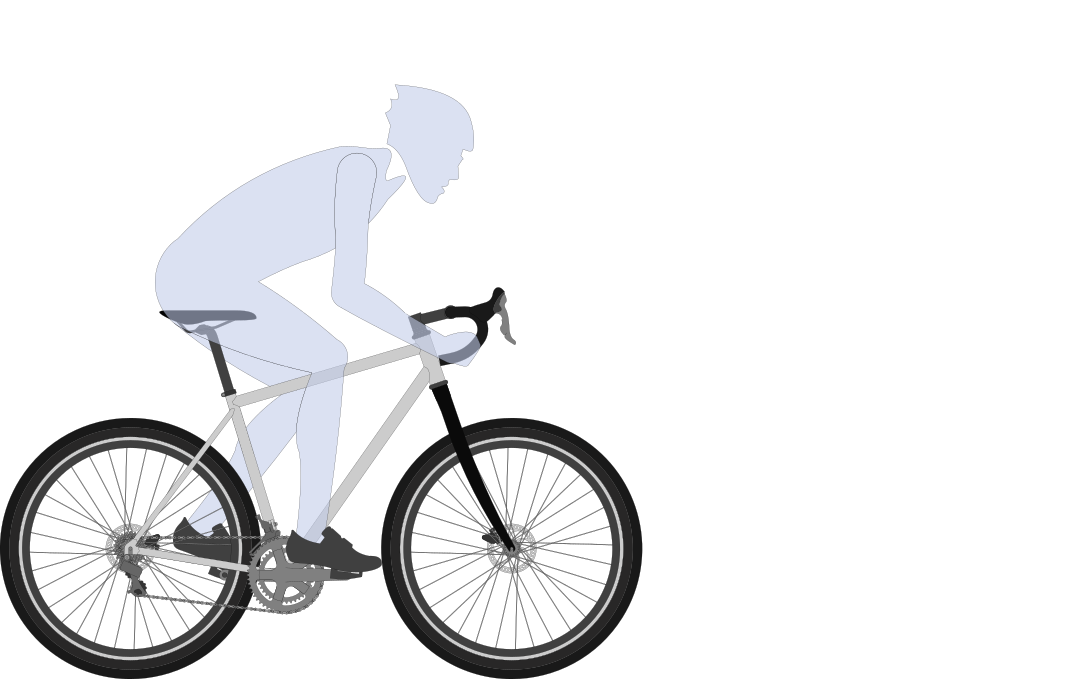

In [6]:
from bikebench.conditioning import conditioning
rider_condition = conditioning.sample_riders(1, split="test")[0]

res = renderer.render_clip(data1, rider_dims=rider_condition)
svg = res.image_bytes
from IPython.display import SVG, display
display(SVG(svg))